# **Posuum linear regression model**


### Can we use All Features to predict a possum's head length?
### Can you predict Sex from All features?
### Can you predict Age using All othe features?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.linear_model as lm

collect the data

In [ ]:
df = pd.read_csv('/content/possum.csv')
df


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
df.drop(columns=['case'], inplace=True)
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df['sex'] = df['sex'].replace(['f', 'm'] , [0, 1])

In [ ]:
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,other,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,other,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,other,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,other,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [ ]:
df['Pop'].unique()

array(['Vic', 'other'], dtype=object)

In [ ]:
df['Pop'] = df['Pop'].replace(['Vic', 'other'], [0, 1])

In [ ]:
df.describe()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,0.557692,0.586538,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,0.499066,0.494839,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,0.000000,0.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,0.000000,0.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,1.000000,1.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,1.000000,1.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,1.000000,1.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [ ]:
df.dropna(inplace = True )

In [ ]:
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,1,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,1,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,1,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,1,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [ ]:
df.reset_index(drop=True, inplace=True)

# **EDA**

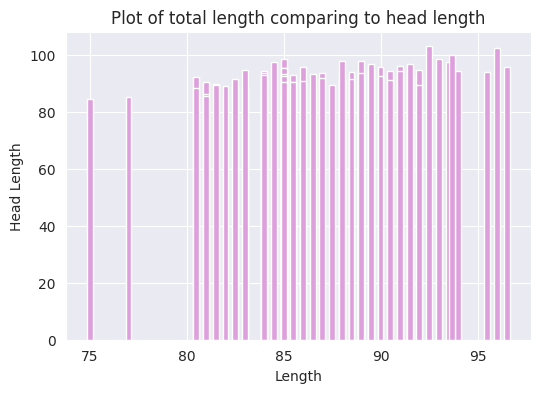

In [ ]:
totalLength = df['totlngth']
headLength = df['hdlngth']

plt.figure(figsize=(6, 4))
plt.bar(totalLength, headLength, color='plum', width = 0.3)
plt.title('Plot of total length comparing to head length')
plt.xlabel('Length')
plt.ylabel('Head Length')
plt.show()


Visualizing all columns

In [ ]:
# sns.set_style('darkgrid')

# sns.pairplot(df)

# Case 1: Total length to predict possum head -
**linear regression simple**

In [ ]:
model1 = lm.LinearRegression()

#x and y
x = df.drop(columns=['hdlngth'])
y = df[['hdlngth']]

#splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# fit the model to the data
model1.fit(x_train , y_train)

#prediction
y_pred = model1.predict(x_test)


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(y_pred.shape)


(70, 12) (70, 1)
(31, 12) (31, 1)
(31, 1)


there is no point of plotting the model , because the size is different between the x and y columns

In [ ]:
# plt.figure(figsize=(6, 4))

# plt.scatter(x_train ,y_train , color='teal' , label = 'training data , 70%')
# plt.scatter(x_test ,y_test , color='plum' , label = 'testing data , 30%')

# plt.plot(x_test, y_pred, color='blueviolet', label= 'Prediction')

# plt.title('Linear Regression')
# plt.xlabel('Total Possum length')
# plt.ylabel('Possum Head Length')
# plt.legend()
# plt.show()



## Evaluation

Calculating MSE

In [ ]:
from sklearn.metrics import mean_squared_error

#MSE = (1/n) * Σ(y_true - y_pred)^2
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.3223431856111785


Calculating R-squared (Coefficient of Determination): R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating a perfect fit.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7164984477449367


# Case2 : Can you predict Sex from All features? - Logistic Regression

In [108]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#data
x = df.drop(columns=['sex'])
y = df[['sex']]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#splitting
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

#use logistic regression model
model2 = LogisticRegression()

model2.fit(x_train, y_train)

#prediction
y_pred = model2.predict(x_test)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Accuracy calculation

In [ ]:
#Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 77.42%


## Confusion Matrix

In [102]:
#for y_test and y_pred
print("Confusion Matrix:\n" , confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[11  2]
 [ 5 13]]


In [109]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.87      0.72      0.79        18

    accuracy                           0.77        31
   macro avg       0.78      0.78      0.77        31
weighted avg       0.79      0.77      0.78        31



## Coefficient

In [106]:
# Get the model coefficients
coef = model2.coef_[0]
intercept = model2.intercept_[0]

# Print the coefficients
print("Coefficients:")
for i, feature in enumerate(x.columns):
    print(f"{feature}: {coef[i]}")
print(f"Intercept: {intercept}")

Coefficients:
site: 0.9164767801893346
Pop: 0.4099849386337055
age: -0.06199132975217684
hdlngth: 0.5761637847057554
skullw: 0.04877320303809236
totlngth: -0.3604926211247862
taill: -0.33750507049535444
footlgth: 0.5368050285966564
earconch: 0.4195890915489412
eye: 0.661691593174788
chest: -0.09838671872971194
belly: -0.3757215551696232
Intercept: 0.35337594826721475
